# Izpit iz numerične matematike
 Ljubljana, 23. 6. 2015
## Naloga 1

Linearen sistem $n=2k$ enačb
  \begin{equation}
    %\label{eq:sistem}
    2x_i+x_{n-i+1}=1.\quad i=1,\ldots,n
  \end{equation}

1. Napišite razširjeno matriko za $n=4$ in rešitev sistema poiščite z LU razcepom.

2. Za $n=20$ rešite sistem (\ref{eq:sistem}) z Jacobijevo iteracijo
      \begin{equation*}
        %\label{eq:Jacobi}
        x_i^{(k+1)} = \frac{1}{a_{ii}}\left(b_i-\sum_{j\not= i}a_{ij}x_j^{(k)}\right).
      \end{equation*}
      Koliko korakov iteracije potrebujemo za 3 pravilne decimalke, če za začetni približek izberemo vektor desnih strani? Koliko operacij potrebujemo za vsako iteracijo? 

In [1]:
A=[2 0 0 1; 0 2 1 0; 0 1 2 0; 1 0 0 2]

A =

   2   0   0   1
   0   2   1   0
   0   1   2   0
   1   0   0   2



In [2]:
b = ones(4,1);

In [3]:
[L,U] = lu(A)

L =

   1.00000   0.00000   0.00000   0.00000
   0.00000   1.00000   0.00000   0.00000
   0.00000   0.50000   1.00000   0.00000
   0.50000   0.00000   0.00000   1.00000

U =

   2.00000   0.00000   0.00000   1.00000
   0.00000   2.00000   1.00000   0.00000
   0.00000   0.00000   1.50000   0.00000
   0.00000   0.00000   0.00000   1.50000



In [4]:
y = L\b

y =

   1.00000
   1.00000
   0.50000
   0.50000



In [5]:
x = U\y

x =

   0.33333
   0.33333
   0.33333
   0.33333



Enačbe lahko preoblikujemo v formulo za Jacobijevo iteracijo, če izrazimo $x_i$
\begin{equation}
x_i^{(n+1)} = \frac{1}{2}\left(1-x_{n-i+1}^{(n)}\right)
\end{equation}
Rekurzivno enačbo lahko enostavno sprogramiramo v octave:

In [6]:
rek = @(x) (1-flipud(x))/2

rek =

@(x) (1 - flipud (x)) / 2



In [29]:
x = ones(20,1);
for i=1:15
x = (1-flipud(x))/2;
printf("%f ",x(1:10))
printf("...\n")
end

0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 ...
0.500000 0.500000 0.500000 0.500000 0.500000 0.500000 0.500000 0.500000 0.500000 0.500000 ...
0.250000 0.250000 0.250000 0.250000 0.250000 0.250000 0.250000 0.250000 0.250000 0.250000 ...
0.375000 0.375000 0.375000 0.375000 0.375000 0.375000 0.375000 0.375000 0.375000 0.375000 ...
0.312500 0.312500 0.312500 0.312500 0.312500 0.312500 0.312500 0.312500 0.312500 0.312500 ...
0.343750 0.343750 0.343750 0.343750 0.343750 0.343750 0.343750 0.343750 0.343750 0.343750 ...
0.328125 0.328125 0.328125 0.328125 0.328125 0.328125 0.328125 0.328125 0.328125 0.328125 ...
0.335938 0.335938 0.335938 0.335938 0.335938 0.335938 0.335938 0.335938 0.335938 0.335938 ...
0.332031 0.332031 0.332031 0.332031 0.332031 0.332031 0.332031 0.332031 0.332031 0.332031 ...
0.333984 0.333984 0.333984 0.333984 0.333984 0.333984 0.333984 0.333984 0.333984 0.333984 ...
0.333008 0.333008 0.333008 0.333008 0.333008 0.333008 0.3330

Rešitev je enaka $x_i=\frac{1}{3}$ in vse komponente konvergirajo enako.

In [31]:
x = ones(20,1);
for i=1:15
x = (1-flipud(x))/2;
printf("%d:\t%f\n",i,x(1))
end

1:	0.000000
2:	0.500000
3:	0.250000
4:	0.375000
5:	0.312500
6:	0.343750
7:	0.328125
8:	0.335938
9:	0.332031
10:	0.333984
11:	0.333008
12:	0.333496
13:	0.333252
14:	0.333374
15:	0.333313


Za 3 pravilne decimalke, potrebujemo 10 korakov Jacobjeve iteracije. Podobno kot pri bisekciji, se napaka na vsakem koraku razpolovi.

Za vsako iteracijo potrebujemo $2n$ operacij. Če upoštevamo, da so vse komponente enake, če ima začetni približek enake komponente pa zgolj 2.

## Naloga 2

Naj bo $y(x)$ rešitev diferencialne enačbe
  \begin{equation*}
    y''-y=-x,
  \end{equation*}
ki zadošča začetnemu pogoju $y(0)=-1$ in $y'(0)=2$.
 
 1. Izračunajte približek za $y(1)$ z Eulerjevo metodo s korakom $h=0.5$. Preverite, da je $y(x)=x-e^{-x}$ in določite lokalno napako na 1. koraku in globalno napako za $y(1)$.
 2. Približek za $y(1)$ poiščite še z metodo RK4 
  \begin{align*}
    k_1&=h f(x_n,y_n)\\
    k_2&=h f(x_n+h/2,y_n+k_1/2)\\
    k_3&=h f(x_n+h/2,y_n+k_2/2)\\
    k_4&=h f(x_n+h,y_n+k_3)\\
    y_{n+1}&=y_n+\frac{k_1+2k_2+2k_3+k_4}{6}
  \end{align*} s korakom $h=0.1$.
 3. Z linearno interpolacijo na podatkih iz prejšnje točke poiščite približek za ničlo. Ocenite napako vašega približka za ničlo in vašo oceno primerjajte z dejansko napako.

##Rešitev
DE najprej prevedemo na sistem, tako da vpeljemo novo spremenljivko $z = y'$
\begin{align*}
y' &= z\\
z' & = y-x
\end{align*}

Hitro lahko preverimo tudi, da je $y=x-e^{-x}$ rešitev začetnega problema:
\begin{align*}
y' &= 1+e^{-x}\\
y''&= -e^{-x},
\end{align*}
če vstavimo v enačbo, se vse pokrajša. Podobno lahko preverimo, da je $y(0)=0-e^{0}=-1$ in $y'(0)=1+e^0=2$.

In [9]:
f = @(x,Y) [Y(2); Y(1)-x]

f =

@(x, Y) [Y(2); Y(1) - x]



In [11]:
#euler
x0 = 0; Y0=[-1;2]; h = 0.5;
Y1 = Y0 + h*f(x0,Y0)

Y1 =

   0.00000
   1.50000



In [12]:
x1 = x0 + h;
Y2 = Y1 + h*f(x1,Y1)

Y2 =

   0.75000
   1.25000



Lokalna napaka na prvem koraku je enaka razliki prave rešitve in približka:

In [13]:
Y1(1)-(x1-exp(-x1))

ans =  0.10653


Globalna napaka v $x=1$ je enaka

In [14]:
Y2(1)-(1-exp(-1))

ans =  0.11788


Metodo RK4 raje zapišemo v zanki

In [33]:
n = 10;
h = 0.1;
Y = zeros(2,n+1); Y(:,1)=Y0;
x = linspace(0,1,n+1);
for i=1:n
 k1 = h*f(x(i),Y(:,i));
 k2 = h*f(x(i)+h/2, Y(:,i)+k1/2);
 k3 = h*f(x(i)+h/2, Y(:,i)+k2/2);
 k4 = h*f(x(i)+h, Y(:,i)+k3);
 Y(:,i+1) = Y(:,i) + (k1+2*k2+2*k3+k4)/6;
end
Y

Y =

 Columns 1 through 7:

  -1.000000  -0.804837  -0.618731  -0.440818  -0.270320  -0.106531   0.051188
   2.000000   1.904837   1.818731   1.740818   1.670320   1.606531   1.548812

 Columns 8 through 11:

   0.203414   0.350671   0.493430   0.632120
   1.496586   1.449329   1.406570   1.367880



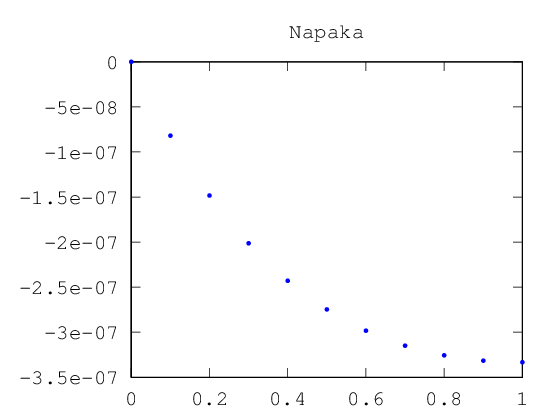

In [34]:
plot(x,Y(1,:)-(x-exp(-x)),'.')
title("Napaka")

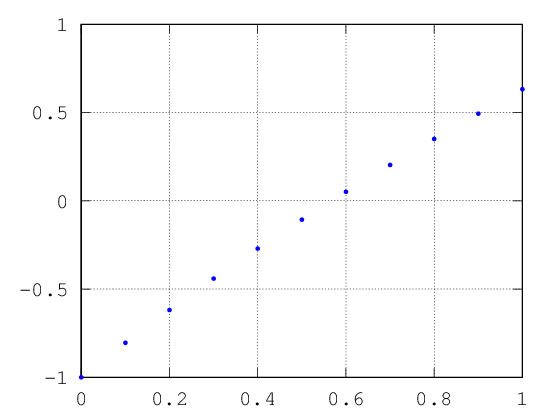

In [37]:
plot(x,Y(1,:),'.')
grid on

Ničla leži na intervalu $[0.5,0.6]$, uporabimo linearno interpolacijo na podatkih:

In [40]:
[x(6:7);Y(1,6:7)]

ans =

   0.500000   0.600000
  -0.106531   0.051188



Iščemo ničlo linearne funkcije, ki interpolira podatke $(a,f(a))$ in $(b,f(b))$. Če izenačimo diferenčne kvociente
$$
\frac{b-a}{f(b)-f(a)}=\frac{x-a}{0-f(a)},
$$
dobimo formulo za $x$
$$
x = a -f(a)\frac{b-a}{f(b)-f(a)}
$$

In [41]:
xn = x(6)-Y(1,6)*(x(7)-x(6))/(Y(1,7)-Y(1,6))

xn =  0.56754


Kot smo videli iz grafa, je napaka metode RK4 zelo majhna, zato lahko ocenimo napako rešitve z napako interpolacije, ki jo dobimo po formuli

$$
\left|\frac{y''(\xi)}{2!}(x-a)(x-b)\right| < |y''(\xi)| h^2/2=0.005 |y''(\xi)|
$$
Oceno za $y''( \xi)$ pa lahko dobimo iz diferencialne enačbe: 

In [46]:
[f(x(6),Y(:,6)) f(x(7),Y(:,7))]

ans =

   1.60653   1.54881
  -0.60653  -0.54881



In [47]:
ocena = 1.606*0.005

ocena =  0.0080300


Če želimo izračunati dejansko napako, potrebujemo pravo rešitev enačbe $x-e^{-x}=0$, ki jo najlažje poiščemo z navadno iteracijo 

In [48]:
x = xn
for i=1:10
x = exp(-x)
end

x =  0.56692
x =  0.56727
x =  0.56707
x =  0.56718
x =  0.56712
x =  0.56716
x =  0.56714
x =  0.56715
x =  0.56714
x =  0.56714


In [49]:
% napaka
x-xn

ans =   -4.0010e-04
